## **🔰=========== Overview ===========🔰**

###  1. **Transfer learning** allows new models to benefit from the learning of **pretrained models**.


*   **Deep Neural Networks** often exist as sequential layered objects. 
*   Transfer learning is the process of **taking a slice** of these pretrained models and **appending new untrained layers** to the slice.
*   This allows layers trained for one task to be **reused for new, usually related, tasks**.
*   The **pretrianed layers** are ❄ **frozen** so that only the **appended layers** are being **trained**.  



![transfer learning](https://drive.google.com/uc?id=1NX90l7nl4zPOaTSO4E3IL4IzvJFU6qpH)
[img source](https://quantum-journal.org/papers/q-2020-10-09-340/)

###  2. **Fine-Tuning** is the process of ☀ **unfreezing** slices of the **pretrained layers**.
###   &emsp; In an effort to allow them to update to **improve model performance**.

## **🔰=========== Getting Started ===========🔰**

In [ ]:
!nvidia-smi

Sun May 15 11:05:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 🔰============ Retrieve Data =============🔰
  * download
  * unzip
  * count # of images
  * get class names

In [8]:
!wget https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py

--2022-05-17 02:55:43--  https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12849 (13K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  12.55K  --.-KB/s    in 0s      

2022-05-17 02:55:43 (122 MB/s) - ‘helper_functions.py’ saved [12849/12849]



In [9]:
#------ Download data in zip format from provided source:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-05-17 02:55:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 173.194.212.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   238MB/s    in 0.7s    

2022-05-17 02:55:45 (238 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [14]:
import random as rnd

In [18]:
from helper_functions import Training_Plot
from helper_functions import view_random_class_images
from helper_functions import BuildCompileFit, ContinueTraining
from helper_functions import unzip_files, count_files, get_class_names

In [19]:
import tensorflow as tf
from helper_functions import view_random_augmented_images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input

In [20]:
import tensorflow_hub as hub

In [11]:
data_folder = '10_food_classes_10_percent'
unzip_files(f'{data_folder}.zip')

Done!


In [ ]:
count_files(data_folder)
print(f'\nClass Names:')
class_names = get_class_names(f'{data_folder}/train')

There are 250 images in "10_food_classes_10_percent/test/chicken_wings".
There are 250 images in "10_food_classes_10_percent/test/sushi".
There are 250 images in "10_food_classes_10_percent/test/fried_rice".
There are 250 images in "10_food_classes_10_percent/test/pizza".
There are 250 images in "10_food_classes_10_percent/test/grilled_salmon".
There are 250 images in "10_food_classes_10_percent/test/hamburger".
There are 250 images in "10_food_classes_10_percent/test/ramen".
There are 250 images in "10_food_classes_10_percent/test/ice_cream".
There are 250 images in "10_food_classes_10_percent/test/steak".
There are 250 images in "10_food_classes_10_percent/test/chicken_curry".
There are 75 images in "10_food_classes_10_percent/train/chicken_wings".
There are 75 images in "10_food_classes_10_percent/train/sushi".
There are 75 images in "10_food_classes_10_percent/train/fried_rice".
There are 75 images in "10_food_classes_10_percent/train/pizza".
There are 75 images in "10_food_classes

## 🔰============ Visualize sample images =============🔰

target folder: 10_food_classes_10_percent/train/ice_cream


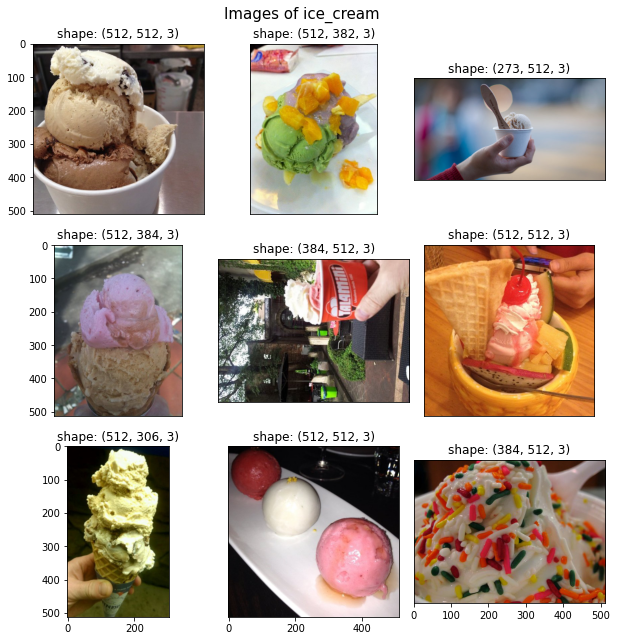

In [ ]:
#--- Set Seed:
rnd.seed(321)

train_folder = f'{data_folder}/train'
class_folder = class_names[5]
view_random_class_images(train_folder,class_folder)

## 🔰*============ Preprocess Data =============*🔰
  * Apply normalization on the interval (0,1)
  * Apply data augmentation to reduce overfitting

In [ ]:
#---Set Random Seed:
tf.random.set_seed(321)

#---Create ImageDataGenerator Instances:

#--Data should be augmented for training data, but not test data
train_IDG_aug = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range = 60,
                                   shear_range = 0.05,
                                   zoom_range = 0.05,
                                   channel_shift_range=0.10,
                                   width_shift_range=0.08,     
                                   height_shift_range=0.08,
                                   horizontal_flip=True,
                                   validation_split=0.15)



test_IDG_aug = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
#--- Set Global Variables
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 322
SHUFFLE = True
CLASS_MODE = 'categorical'

#--- Set path names:
train_folder = f'{data_folder}/train'
test_folder = f'{data_folder}/test'

train_data = train_IDG_aug.flow_from_directory(train_folder,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode=CLASS_MODE,
                                                   shuffle=SHUFFLE,
                                                   subset='training',
                                                   seed=SEED)

valid_data = train_IDG_aug.flow_from_directory(train_folder,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode=CLASS_MODE,
                                                   shuffle=SHUFFLE,
                                                   subset='validation',
                                                   seed= SEED + 1)

test_data = test_IDG_aug.flow_from_directory(test_folder,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode=CLASS_MODE,
                                             shuffle=SHUFFLE,
                                             seed= SEED + 2)

Found 640 images belonging to 10 classes.
Found 110 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


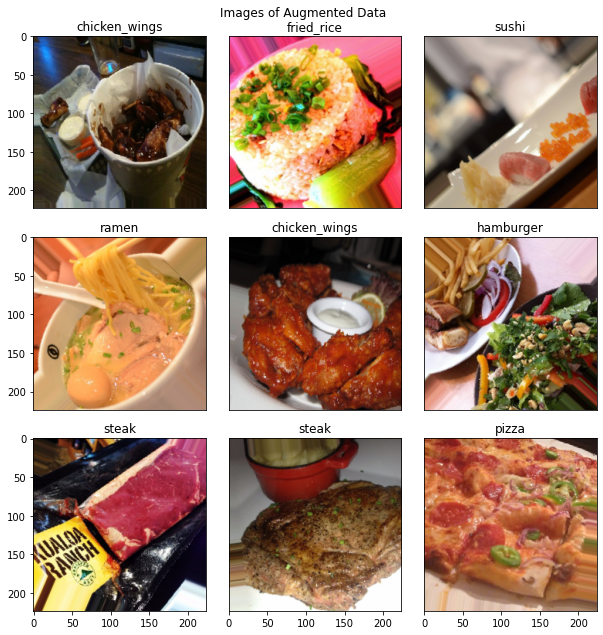

In [ ]:
view_random_augmented_images(train_data,class_names)

## 🔰============ Callbacks =============🔰
* [Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) provide increased functionality, using data collected pre and post training.
* Popular callbacks:
  * **TensorBoard Callback**: Tracking experiments
  * **ModelCheckpoint Callback**
  * **Early Stopping**: To prevent model from training while loss curve has flattened. 

In [12]:
#--Create a TensorBoard Callbak:
from datetime import datetime
from tensorflow.keras import callbacks

In [13]:
def create_tensorboard_callback(dir_name, experiment_name):
  #---Create Log Directory:
  time_stamp = datetime.now().strftime("%y%m%d_%H%M%S")  #yymmdd_HHMMSS
  log_dir = f'{dir_name}/{experiment_name}/{time_stamp}'

  #--Init TB callback:
  tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir)
  
  #---Return output:
  print(f'Set TensorBoard log files to: {log_dir}')
  return tensorboard_callback

## 🔰========= Getting Access to Pretrained Models/Layers ==========🔰
* ### **Intro:** [TensorFlow Hub](https://www.tensorflow.org/hub/)
* ### **Repository**: [TFHub.dev](https://tfhub.dev/)

* ### **PreTrained Models**: [efficientnet-b0](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1), [ResNet50](https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5)
    * ### [Efficientnet Explained](https://paperswithcode.com/method/efficientnet)
    * ### [ResNet Explained](https://paperswithcode.com/method/resnet)



---


![transfer learning](https://drive.google.com/uc?id=1Gr9mac7FLencLo7ByxciaBaiR3C5gujO)
![transfer learning](../ref_images/ref_04_transfer_learning_02.PNG)



---


![transfer learning](https://drive.google.com/uc?id=1HVJmwxMLLlKZ9GTKxf4yUPBUu02-ujgg)
![transfer learning](../ref_images/ref_04_transfer_learning_03.PNG)

In [ ]:
#@title Helper Functions: get_pretrained_layer

def get_pretrained_layer(model_url,input_shape):
  """
    Takes a TensorFlow Hub URL and returns a pretrained model as a Keras Layer.

    Returns:
      a feature extractor layer
      
  """

  feature_extractor_layer = hub.KerasLayer(handle=model_url,
                                           trainable=False,
                                           name='Pretrained_Layer',
                                           input_shape=input_shape)
  print(f'Successfully Built Layer from: {model_url}')
  return feature_extractor_layer

In [ ]:
url_resnet = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
url_effnet = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
INPUT_SHAPE = (224,224,3)
layer_resnet = get_pretrained_layer(url_resnet,INPUT_SHAPE)
layer_effnet = get_pretrained_layer(url_effnet,INPUT_SHAPE)

Successfully Built Layer from: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Successfully Built Layer from: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1


## 🔰============ Build Models =============🔰
* Note: 
  * Model performance **assuming random guessing** is **10% accuracy**.
  * Model peformance from **previous section** is **53% accuracy** 

In [ ]:
#--- ResNet Architecture:
INPUT_SHAPE = (224,224,3)
NUM_CLASSES = class_names.shape[0]

layers_resnet_0 = [Input(shape=INPUT_SHAPE,name='Input'),
                 layer_resnet,
                 Dense(units=NUM_CLASSES,                     # number of units, needs to match number of classes
                       activation='softmax',
                       name = 'Dense_out_rn0')          
                 ]


In [ ]:
tb_resnet_0 = create_tensorboard_callback(dir_name='tensorboard',
                                          experiment_name='model_resnet_0')

Set TensorBoard log files to: tensorboard/model_resnet_0/220513_154343


Epoch 1/5
20/20 [==============================] - 20s 668ms/step - loss: 2.4475 - accuracy: 0.3000 - val_loss: 1.8891 - val_accuracy: 0.4182
Epoch 2/5
20/20 [==============================] - 11s 554ms/step - loss: 1.1894 - accuracy: 0.6172 - val_loss: 1.5242 - val_accuracy: 0.4818
Epoch 3/5
20/20 [==============================] - 11s 548ms/step - loss: 0.8743 - accuracy: 0.7125 - val_loss: 1.1350 - val_accuracy: 0.6273
Epoch 4/5
20/20 [==============================] - 12s 597ms/step - loss: 0.7364 - accuracy: 0.7312 - val_loss: 1.1568 - val_accuracy: 0.5909
Epoch 5/5
20/20 [==============================] - 11s 552ms/step - loss: 0.6389 - accuracy: 0.7797 - val_loss: 1.0925 - val_accuracy: 0.6455


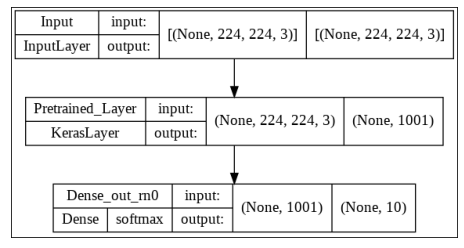

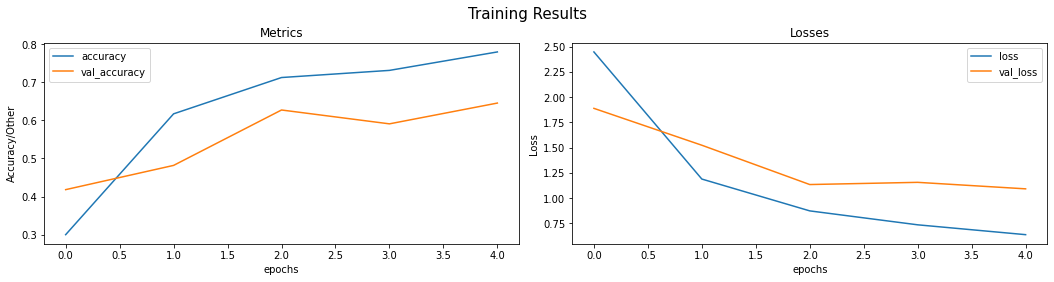

In [ ]:
#--- Build, Compile, and Fit model:
model_resnet_0,history_resnet_0 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_resnet_0,
                                   loss=tf.keras.losses.CategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=[tb_resnet_0],
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

In [ ]:
model_resnet_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pretrained_Layer (KerasLaye  (None, 1001)             25615849  
 r)                                                              
                                                                 
 Dense_out_rn0 (Dense)       (None, 10)                10020     
                                                                 
Total params: 25,625,869
Trainable params: 10,020
Non-trainable params: 25,615,849
_________________________________________________________________


In [ ]:
model_resnet_0.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 0.7924 - accuracy: 0.7448


[0.7923687696456909, 0.7447999715805054]

### ⚡ After only **5 epochs** with **transfer learning from ResNet50**, this model was able to achieve **74% test accuracy!**

### 🔑 The loss curves are **not diverging** & they have **not plateaued** implying the model is **not overfitting** and will **benefit from continued training**. 


In [ ]:
#--- EfficientNet Architecture:
INPUT_SHAPE = (224,224,3)
NUM_CLASSES = class_names.shape[0]

layers_effnet_0 = [Input(shape=INPUT_SHAPE,name='Input'),
                 layer_effnet,
                 Dense(units=NUM_CLASSES,                     # number of units, needs to match number of classes
                       activation='softmax',
                       name='Dense_out_en0')          
                 ]

In [ ]:
tb_effnet_0 = create_tensorboard_callback(dir_name='tensorboard',
                                          experiment_name='model_effnet_0')

Set TensorBoard log files to: tensorboard/model_effnet_0/220513_154606


Epoch 1/5
20/20 [==============================] - 21s 620ms/step - loss: 1.9453 - accuracy: 0.3781 - val_loss: 1.6438 - val_accuracy: 0.5455
Epoch 2/5
20/20 [==============================] - 11s 537ms/step - loss: 1.2597 - accuracy: 0.7250 - val_loss: 1.3082 - val_accuracy: 0.6636
Epoch 3/5
20/20 [==============================] - 11s 539ms/step - loss: 0.9319 - accuracy: 0.8016 - val_loss: 1.0398 - val_accuracy: 0.7273
Epoch 4/5
20/20 [==============================] - 11s 536ms/step - loss: 0.7658 - accuracy: 0.8281 - val_loss: 1.0183 - val_accuracy: 0.7364
Epoch 5/5
20/20 [==============================] - 11s 544ms/step - loss: 0.6698 - accuracy: 0.8344 - val_loss: 0.9427 - val_accuracy: 0.7273


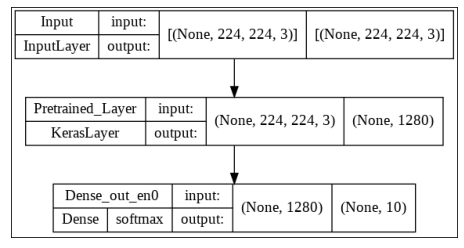

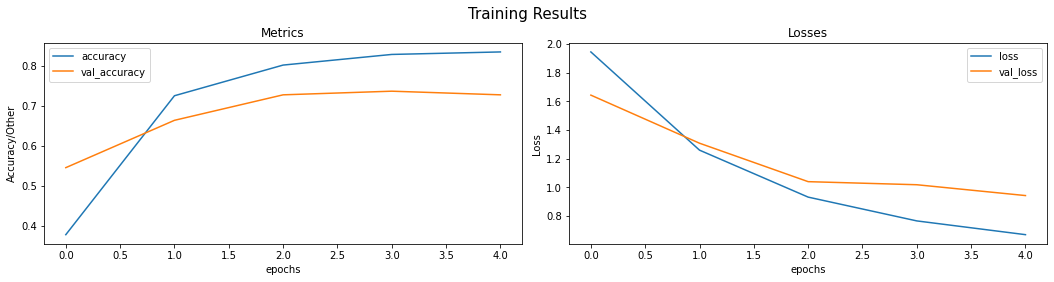

In [ ]:
#--- Build, Compile, and Fit model:
model_effnet_0,history_effnet_0 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_effnet_0,
                                   loss=tf.keras.losses.CategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=[tb_effnet_0],
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

In [ ]:
model_effnet_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pretrained_Layer (KerasLaye  (None, 1280)             4049564   
 r)                                                              
                                                                 
 Dense_out_en0 (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
model_effnet_0.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 0.6588 - accuracy: 0.8320


[0.6587738394737244, 0.8320000171661377]

### ⚡ After only **5 epochs** and using **transfer learning from efficientnet-b0**, this model was able to achieve **83% accuracy!**

### 🔑 The loss curves are **not diverging** & they have **not plateaued** implying the model is **not overfitting** and will **benefit from continued training**. 

## 🔰============ Reviewing Models with Tensorboard =============🔰

  * ## [Tensorboard.dev](https://tensorboard.dev/)

In [ ]:
!tensorboard dev upload \
  --logdir ./tensorboard \
  --name "EfficientNet_b0 vs ResNet50v2" \
  --description "Comparing accuracy of 2 models via transfer learning on food image classification" \
  --one_shot 


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=VC9y8DCcde47PPbKYbqg3fitMTcABb&prompt=consent&access_type=offline

## View Tensorboard [Here](https://tensorboard.dev/experiment/Y9mQrLQwS3aVJ4WhYHGV2g/)

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/LuLr6y50QIaH7qf4EdLz1Q/
	Name                 EfficientNet_b0 vs ResNet50v2
	Description          Comparing accuracy of 2 models via transfer learning on food image classification
	Id                   LuLr6y50QIaH7qf4EdLz1Q
	Created              2022-05-15 11:50:12 (36 seconds ago)
	Updated              2022-05-15 11:50:14 (34 seconds ago)
	Runs                 2
	Tags                 3
	Scalars              20
	Tensor bytes         0
	Binary object bytes  1614441
https://tensorboard.dev/experiment/Y9mQrLQwS3aVJ4WhYHGV2g/
	Name                 EfficientNet_b0 vs ResNet50v2
	Description          Comparing accuracy of 2 models via transfer learning on food image classification
	Id                   Y9mQrLQwS3aVJ4WhYHGV2g
	Created              2022-05-13 14:18:32
	Updated              2022-05-13 14:18:36
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5791878
https://tensorboard.dev/

In [ ]:
#---- How to delete an experiment from Tensorboard:
#!tensorboard dev delete --experiement_id <id>

## **TensorBoard Preview**
![transfer learning](https://drive.google.com/uc?id=1Bxe41xbuf47nqBzNiPx6LBSC1k8A0PL-)
![text name](../ref_images/ref_04_transfer_learning_04.PNG)

## 🔰============ Exploring Alternative TensorFlow Functionality =============🔰
  * ### Preprocessing: **image_data_from_directory** vs **ImageDataGenerator**
  * ### Architecture: **Sequential** API vs **Functional API**
  * ### Repository: **Applications Module** vs **Tensor.dev**

<br>
 

---



* **Note:** tensorflow [applications module](https://www.tensorflow.org/api_docs/python/tf/keras/applications) contains a number of pretrained models useful for transfer-learning<br>
 (including ResNet50 & EfficientNet-b0)

* **Note:** tensorflow [Functional API](https://www.tensorflow.org/guide/keras/functional) offers more flexibility over [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) as it can contain non-linear connections

* **Note:** TensorFlow's [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) is [prefered](https://datascience.stackexchange.com/questions/78405/image-dataset-from-directory-vs-flow-from-directory) over ImageDataGenerator since it allows direct use<br> of tensorflows [preprocess layers](https://www.tensorflow.org/guide/keras/preprocessing_layers)

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
data_folder = '10_food_classes_10_percent'
train_folder = f'{data_folder}/train'
test_folder = f'{data_folder}/test'

In [ ]:
IMG_SIZE = (224,224)
class_mode = 'categorical'                #encodes as a categorical vector
BATCH_SIZE = 32
SEED = 321
train_data = image_dataset_from_directory(directory=train_folder,
                                          image_size=IMG_SIZE,
                                          label_mode=class_mode,      
                                          batch_size=BATCH_SIZE,
                                          validation_split=0.10,
                                          subset='training',
                                          seed=SEED)

valid_data = image_dataset_from_directory(directory=train_folder,
                                          image_size=IMG_SIZE,
                                          label_mode=class_mode,
                                          batch_size=BATCH_SIZE,
                                          validation_split=0.10,
                                          subset='validation',
                                          seed=SEED+1)

test_data = image_dataset_from_directory(directory=test_folder,
                                          image_size=IMG_SIZE,
                                          label_mode=class_mode,
                                          batch_size=BATCH_SIZE,
                                          seed=SEED+2)     

Found 750 files belonging to 10 classes.
Using 675 files for training.
Found 750 files belonging to 10 classes.
Using 75 files for validation.
Found 2500 files belonging to 10 classes.


In [ ]:
print(type(train_data),
      train_data.element_spec,
      train_data.class_names,
      sep='\n')

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


##=====Note:
### 🔔  ***Keras EfficientNet*** models expect their inputs to be float tensors of pixels with values in the [0-255] range because it has **rescaling [built in](https://keras.io/api/applications/efficientnet/).**

In [15]:
from tensorflow.keras import Model, optimizers
from tensorflow.keras.applications import EfficientNetB0               #<<--- Keras efficientnet
from tensorflow.keras.layers import Rescaling,GlobalAveragePooling2D

In [ ]:
#-------------------------------------------------------------------Initilize keras-EffNet
INPUT_SHAPE = IMG_SIZE + (3,)
layer_effnetB0_1 = EfficientNetB0(include_top=False,
                            input_shape=INPUT_SHAPE)

layer_effnetB0_1.trainable = False                                   #Freeze layer 

#--------------------------------------------------------------------Model Architecture
inputs = Input(shape=INPUT_SHAPE,name='Input_Layer1')                #Input
x = layer_effnetB0_1(inputs)                                         #Effnet
x = GlobalAveragePooling2D(name='GAP_1')(x)                          #Pool
x = Flatten()(x)                                                     #Flatten
outputs = Dense(10,activation='softmax',name='Output_1')(x)          #Output

#---------------------------------------------------------------------Initilize & Compile
model_effnet_1 = Model(inputs,outputs)                       

model_effnet_1.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(),
                       metrics=['accuracy'],
                       )



#-------------------------------------------------------------------Training Setup
train_steps = len(train_data)
valid_steps = int(0.25*len(valid_data))                             #<<---This will speed up training
tb_effnet_1 = create_tensorboard_callback(dir_name='tensorboard',
                                          experiment_name='model_effnet1')

#------------------------------------------------------------------Train
history_effnet_1 = model_effnet_1.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=train_steps,
                                      validation_data=valid_data,
                                      validation_steps=valid_steps,
                                      callbacks=[tb_effnet_1],
                                      )


Set TensorBoard log files to: tensorboard/model_effnet1/220515_113621
Epoch 1/5
22/22 [==============================] - 7s 76ms/step - loss: 1.8888 - accuracy: 0.4000
Epoch 2/5
22/22 [==============================] - 2s 74ms/step - loss: 1.1745 - accuracy: 0.7363
Epoch 3/5
22/22 [==============================] - 2s 73ms/step - loss: 0.8700 - accuracy: 0.7911
Epoch 4/5
22/22 [==============================] - 2s 73ms/step - loss: 0.7195 - accuracy: 0.8296
Epoch 5/5
22/22 [==============================] - 2s 74ms/step - loss: 0.6201 - accuracy: 0.8578


In [ ]:
model_effnet_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer1 (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 GAP_1 (GlobalAveragePooling  (None, 1280)             0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 Output_1 (Dense)            (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

## ⚡Note that this model only took **15 seconds** to train **5 epochs** and achieved **85% accuracy**!

## 🔑 by only passing **25%** of the **validation samples at each step**, the **training time** of the model was **significantly reduced**. (valid_steps = int(0.25*len(valid_data)) )

#==================== ⚖ **Comparison**
## Build a new model using **GlobalMaxPooling** to view its effect:

In [16]:
from tensorflow.keras.layers import GlobalMaxPooling2D

In [ ]:
#-------------------------------------------------------------------Initilize keras-EffNet
INPUT_SHAPE = IMG_SIZE + (3,)
layer_effnetB0_2 = EfficientNetB0(include_top=False,
                            input_shape=INPUT_SHAPE)

layer_effnetB0_2.trainable = False                                   #Freeze layer 

#--------------------------------------------------------------------Model Architecture
inputs = Input(shape=INPUT_SHAPE,name='Input_Layer2')                #Input
x = layer_effnetB0_2(inputs)                                         #Effnet
x = GlobalMaxPooling2D(name='GMP_2')(x)                              #Pool
x = Flatten()(x)                                                     #Flatten
outputs = Dense(10,activation='softmax',name='Output_2')(x)          #Output

#---------------------------------------------------------------------Initilize & Compile
model_effnet_2 = Model(inputs,outputs)                       

model_effnet_2.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(),
                       metrics=['accuracy'],
                       )



#-------------------------------------------------------------------Training Setup
train_steps = len(train_data)
valid_steps = int(0.25*len(valid_data))                             #<<---This will speed up training
tb_effnet_2 = create_tensorboard_callback(dir_name='tensorboard',
                                          experiment_name='model_effnet2')

#------------------------------------------------------------------Train
history_effnet_2 = model_effnet_2.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=train_steps,
                                      validation_data=valid_data,
                                      validation_steps=valid_steps,
                                      callbacks=[tb_effnet_2],
                                      )

Set TensorBoard log files to: tensorboard/model_effnet2/220515_122753
Epoch 1/5
22/22 [==============================] - 7s 75ms/step - loss: 3.9832 - accuracy: 0.2178
Epoch 2/5
22/22 [==============================] - 2s 74ms/step - loss: 1.8339 - accuracy: 0.5319
Epoch 3/5
22/22 [==============================] - 2s 74ms/step - loss: 1.2607 - accuracy: 0.6370
Epoch 4/5
22/22 [==============================] - 2s 74ms/step - loss: 0.9480 - accuracy: 0.7333
Epoch 5/5
22/22 [==============================] - 2s 73ms/step - loss: 0.7168 - accuracy: 0.7719


# 🔑 Even though the **same EffNet base model was used**, switching to a **different pooling strategy** has **negatively effected** the **performance** of the model. It appears some information was lost when switching from Average Pooling to Max Pooling. 



In [ ]:
!tensorboard dev upload \
  --logdir ./tensorboard \
  --name "EfficientNet_b0 vs ResNet50v2" \
  --description "Comparing accuracy of 2 models via transfer learning on food image classification" \
  --one_shot 


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/NB4y360oRTemXhdu5rNZUw/

[2022-05-15T13:29:02] Started scanning logdir.
[2022-05-15T13:29:06] Total uploaded: 40 scalars, 0 tensors, 4 binary objects (3.1 MB)
[2022-05-15T13:29:06] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/NB4y360oRTemXhdu5rNZUw/


## 🔰======== Build Preprocessing Into the Model ==========🔰
  * ## [Benefits](https://www.tensorflow.org/guide/keras/preprocessing_layers):
    * ### Leverage **GPU acceleration**.
    * ### Enables **model portability**.
    * ### Reduce [**Training/Serving Skew**](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew)

<br><br>  
###❗Note that image data augmentation layers are only active during training (similarly to the Dropout layer).

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom,RandomHeight,RandomWidth

In [ ]:
layers_aug = [RandomFlip('horizontal'),
              RandomRotation(factor=(-0.10,0.10)),   #Fraction of 2*PI
              RandomZoom(height_factor=0.20),
              RandomHeight(factor=0.20),
              RandomWidth(factor=0.20),
              ]
data_augmentation = Sequential(layers_aug,name='DataAug')


In [ ]:
#-------------------------------------------------------------------Initilize keras-EffNet
INPUT_SHAPE = IMG_SIZE + (3,)
layer_effnetB0_3 = EfficientNetB0(include_top=False,
                            input_shape=INPUT_SHAPE)

layer_effnetB0_3.trainable = False                                   #Freeze layer 

#--------------------------------------------------------------------Model Architecture
inputs = Input(shape=INPUT_SHAPE,name='Input_Layer3')                #Input
x = data_augmentation(inputs)                                        #Preprocess
x = layer_effnetB0_3(x,training=False)                               #Effnet
x = GlobalMaxPooling2D(name='GMP_3')(x)                              #Pool
x = Flatten()(x)                                                     #Flatten
outputs = Dense(10,activation='softmax',name='Output_3')(x)          #Output

#---------------------------------------------------------------------Initilize & Compile
model_effnet_3 = Model(inputs,outputs)                       

model_effnet_3.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(),
                       metrics=['accuracy'],
                       )



#-------------------------------------------------------------------Training Setup
train_steps = len(train_data)
valid_steps = int(0.25*len(valid_data))                             #<<---This will speed up training
tb_effnet_3 = create_tensorboard_callback(dir_name='tensorboard',
                                          experiment_name='model_effnet3')

#------------------------------------------------------------------Train
history_effnet_3 = model_effnet_3.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=train_steps,
                                      validation_data=valid_data,
                                      validation_steps=valid_steps,
                                      callbacks=[tb_effnet_3],
                                      )

Set TensorBoard log files to: tensorboard/model_effnet3/220515_153619
Epoch 1/5
22/22 [==============================] - 12s 269ms/step - loss: 3.9597 - accuracy: 0.1896
Epoch 2/5
22/22 [==============================] - 6s 250ms/step - loss: 2.1018 - accuracy: 0.4533
Epoch 3/5
22/22 [==============================] - 6s 229ms/step - loss: 1.4825 - accuracy: 0.5941
Epoch 4/5
22/22 [==============================] - 6s 245ms/step - loss: 1.1144 - accuracy: 0.6637
Epoch 5/5
22/22 [==============================] - 6s 282ms/step - loss: 0.9830 - accuracy: 0.7156


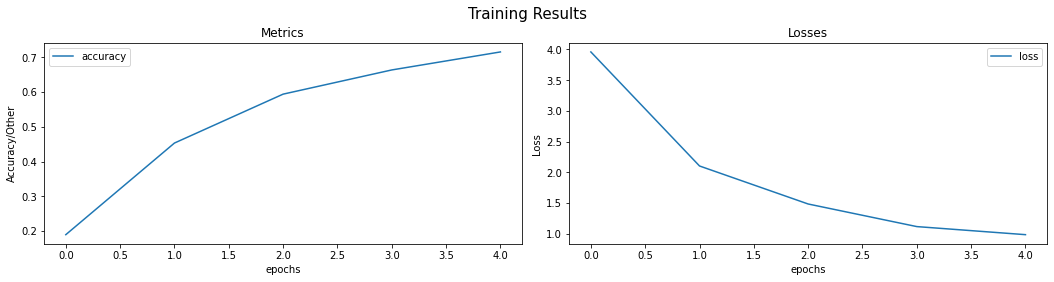

In [ ]:
Training_Plot(history_effnet_3)

## 🔰============ Fine Tuning =============🔰
